# **Connection Of Python To PgAdmin 4 (SQL)**

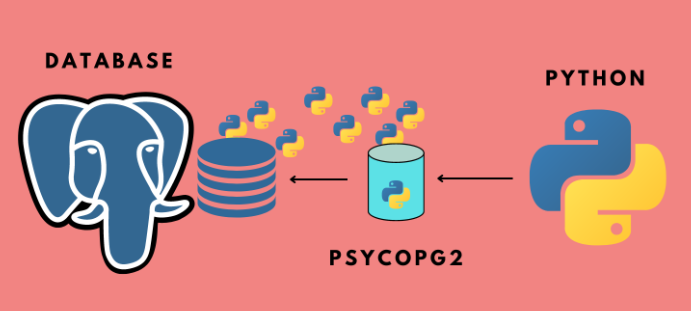

**By:** Praveen Choudhary

### **Write a Python Class Library with methods to create 04 tables book, Member, Author, book_issue**

1. Bookbook_id(PK), Title, Quantity

2. Member member_id(PK), name, address, phone

3. Author author_id(PK), name, Nationality

4. Book Issue book_id(FK), member_id(FK), issue_date, return date

Also, write a function that Calculates how many days a book is available to Students.

In [5]:
# Import Some Library 
import psycopg2 as ps
import datetime
import pandas as pd

In [309]:
# Create A calss Library 
class Library():
    def __init__(self):
        Library.connection = ps.connect(database='Institute',user ='postgres',password = 'Helping@1034',port=5433)
        Library.cursor = Library.connection.cursor()
    #a method to create a table 
    def create_table_Book(self):
        # Drop the table if exist
        query ='drop table if exists book cascade'
        Library.cursor.execute(query)
        #create table
        query = 'create table book (Book_id int primary key,\
                                    Title varchar(50),\
                                    Quantity int)'
        Library.cursor.execute(query)
        print('The Book Table is created')
        Library.connection.commit()
        #closing connection
        Library.connection.close() 
        
    def create_table_Member(self):
        # Drop the table if exist
        query ='drop table if exists member cascade'
        Library.cursor.execute(query)
        #create table
        query = 'create table member (member_id int primary key,\
                                      Name varchar(20),\
                                      address text,\
                                      phone bigint)'
        Library.cursor.execute(query)
        print('The member Table is created')
        Library.connection.commit()
        #closing connection
        Library.connection.close() 
    
    def create_table_Author(self):
        # Drop the table if exist
        query ='drop table if exists author cascade'
        Library.cursor.execute(query)
        #create table
        query = 'create table author (author_id int primary key,\
                                      Name varchar(20),\
                                      nationality varchar(20))'
        Library.cursor.execute(query)
        print('The author Table is created')
        Library.connection.commit()
        #closing connection
        Library.connection.close()  
    
    def create_table_Book_issue(self):
        # Drop the table if exist
        query = 'drop table if exists book_issue cascade'
        Library.cursor.execute(query)
        #create table 
        query = 'create table book_issue(book_id int,\
                                         member_id int,\
                                         issue_date date,\
                                         return_date date,\
                                         constraint book_id_fk foreign key (book_id) references book(Book_id),\
                                         constraint member_id_fk foreign key (member_id) references member(member_id))'
        Library.cursor.execute(query)
        print('The Book_Issue Table Is Created')
        Library.connection.commit()
        #Closing Connection
        Library.connection.close()  


    def Multiple_Insert_In_Book(self):
        values = [(101,'Python For Data Science',10),(102,'Computional Science',5),(103,'SQL For Data Science',6)]
        # cursor mogrify to insert multiple value the method use
        args= ','.join(Library.cursor.mogrify("(%s,%s,%s)",i).decode('utf-8') for i in values)
        
        Library.cursor.execute('Insert into book values'+(args))
        print('Book Records Insert')
        Library.connection.commit()
        #closing Connection
        Library.connection.close()
    
    def insert_records_member(self):
        query = "insert into member values (1001,'Vivek','Mumbai',9958623598),\
                                           (1002,'Aditi','Pune',9928311260),\
                                           (1003,'Anchal','Rajasthan',8625983542)"
        Library.cursor.execute(query)
        print('Data Is Inserted in member Table')
        Library.connection.commit()
        #close connection
        Library.connection.close()

    def execute_many_author(self):
    # using cursor.executemany() to insert the dataframe

        tuples = [tuple(x) for x in df.to_numpy()]
        print('The Data From CSV File Is')
        print(tuples)
        
    #comma-separated dataframe calumns
        cols = ','.join(list(df.columns))
        print('Columns are',cols)
        
    #sql query
        query = "Insert Into  author Values(%%s,%%s,%%s)"%(tuples)
        
        try:
            Library.cursor.executemany(query,tuples)
            Library.connection.commit()
        
        except (Exception,ps.DatabaseError) as error:
            print("Error L %s"%error)
            Library.connection.rollback()
            Library.cursor.close()
            return 1
        print("Execute_many() done")
        Library.cursor.close()
        
    def insert_records_Book_issue(self):
        query = "insert into book_issue values (101,1001,'2023-12-17','2024-01-1'),\
                                           (102,1003,'2023-11-17','2024-01-17'),\
                                           (103,1002,'2024-01-14','2024-01-25')"
        Library.cursor.execute(query)
        print('Data Is Inserted in book_issue Table')
        Library.connection.commit()
        #close connection
        Library.connection.close()

    def Calculate_days(self,member_id):
        query = "select s.member_id,s.name,m.return_date-m.issue_date as Days_Book_Available_with_member \
                        from member as s \
                        join book_issue as m \
                        on s.member_id = m.member_id \
                        where s.member_id = '%s'"%member_id
        self.cursor.execute(query)
        result=self.cursor.fetchall()
        print(result)
        Library.connection.commit()
        #close connection
        Library.connection.close()
        
    def findBook(self,book_id):
        query = "select b.book_id,b.Title,m.name from book as b, \
                        book_issue as i,member as m\
                        where i.member_id = m.member_id and i.book_id = b.book_id and \
                        b.book_id = '%s'"%book_id
        self.cursor.execute(query)
        result=self.cursor.fetchall()
        print(result)
        Library.connection.commit()
        #close connection
        Library.connection.close()

### **Create Book Table**

In [310]:
# Create Book Table
ctable=Library()
book = ctable.create_table_Book()

The Book Table is created


### **Create Member Table**

In [311]:
# Create Member Table
ctable=Library()
member = ctable.create_table_Member()

The member Table is created


### **Create Member Author**

In [312]:
# Create Member Author
ctable=Library()
author = ctable.create_table_Author()

The author Table is created


### **Create Book Issue Table**

In [313]:
# Create Book Issue Table 
ctable=Library()
Book_issue_ = ctable.create_table_Book_issue()

The Book_Issue Table Is Created


### **Insert records in Book Table**

In [314]:
# insert records in Book Table 
ctable=Library()
Book_data_ = ctable.Multiple_Insert_In_Book()

Book Records Insert


### **Insert records in Member Table**

In [315]:
# insert records in Member Table 
ctable=Library()
Book_data_ = ctable.insert_records_member()

Data Is Inserted in member Table


## **Insert Records in Author table** (excel csv) 

In [316]:
# read data from csv
df=pd.read_csv("C:\\Users\\praveen choudhary\\Desktop\\research\\Author_csv.csv")
df.head(5)

,author_id,Name,nationality
0,201,Prakash,India
1,202,Rajesh,India
2,203,M.k.,USA
3,204,Rich K.,Canada


In [317]:
# insert records in Author Table with csv
ctable=Library()
Author_data_ = ctable.execute_many_author()

The Data From CSV File Is
[(201, 'Prakash', 'India'), (202, 'Rajesh', 'India'), (203, 'M.k.', 'USA'), (204, 'Rich K.', 'Canada')]
Columns are author_id,Name,nationality
Execute_many() done


### **Insert Records In Book_issue Table** 

In [318]:
# insert records in Book_issue Table 
ctable=Library()
Author_data_ = ctable.insert_records_Book_issue()

Data Is Inserted in book_issue Table


### **How Many Days Book Available With Student**
- By Member_id

In [319]:
# How Many Days Book Available With Member 
ctable=Library()
Days_Available_ = ctable.Calculate_days(1003)

# Display (member_id,Member_Name,How_many_days)

[(1003, 'Anchal', 61)]


### **Find person that issue the book with person name and book name** 
- by Book_Id

In [321]:
# Find that person who issue that paticular book
ctable=Library()
Days_Available_ = ctable.findBook(101)

[(101, 'Python For Data Science', 'Vivek')]
